# Covid Analysis - India

In [125]:
#import pandas
import pandas as pd

In [126]:
#import dataset
data = pd.read_csv('https://raw.githubusercontent.com/WidhyaOrg/datasets/master/covid19.csv')
print(data.shape)

(270, 7)


In [127]:
#check dataset
data.head(n=10)

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0
5,6,04/02/20,Kerala,3,0,0,0
6,7,05/02/20,Kerala,3,0,0,0
7,8,06/02/20,Kerala,3,0,0,0
8,9,07/02/20,Kerala,3,0,0,0
9,10,08/02/20,Kerala,3,0,0,0


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       270 non-null    int64 
 1   Date                      270 non-null    object
 2   State/UnionTerritory      270 non-null    object
 3   ConfirmedIndianNational   270 non-null    int64 
 4   ConfirmedForeignNational  270 non-null    int64 
 5   Cured                     270 non-null    int64 
 6   Deaths                    270 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 14.9+ KB


In [129]:
#datatype check
data.dtypes

Sno                          int64
Date                        object
State/UnionTerritory        object
ConfirmedIndianNational      int64
ConfirmedForeignNational     int64
Cured                        int64
Deaths                       int64
dtype: object

In [130]:
data.describe()

,Sno,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,135.500000,5.551852,1.329630,0.603704,0.092593
std,78.086491,8.339625,3.587288,1.461522,0.290399
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,68.250000,1.000000,0.000000,0.000000,0.000000
50%,135.500000,3.000000,0.000000,0.000000,0.000000
75%,202.750000,6.000000,0.000000,0.000000,0.000000
max,270.000000,60.000000,14.000000,9.000000,1.000000


In [131]:
#check for null values
data.isnull().sum()

Sno                         0
Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
dtype: int64

In [132]:
#removing columns and renaming
data = data[['Date','ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths']]
data.columns = [ 'Date','ConfirmedIndianNational','ConfirmedForeignNational','RecoveryCount','DeathCount']

In [133]:
#adding total cases column
data["total"] = data.sum(axis=1)

In [134]:
#grouping by date
group = data.groupby(["Date"], sort=False, as_index=False).agg("sum")


In [135]:
group.head(n=10)

,Date,ConfirmedIndianNational,ConfirmedForeignNational,RecoveryCount,DeathCount,total
0,30/01/20,1,0,0,0,1
1,31/01/20,1,0,0,0,1
2,01/02/20,2,0,0,0,2
3,02/02/20,3,0,0,0,3
4,03/02/20,3,0,0,0,3
5,04/02/20,3,0,0,0,3
6,05/02/20,3,0,0,0,3
7,06/02/20,3,0,0,0,3
8,07/02/20,3,0,0,0,3
9,08/02/20,3,0,0,0,3


In [136]:
#task 3 total cases on 04/03/20
group.loc[group["Date"] == "04/03/20"]

,Date,ConfirmedIndianNational,ConfirmedForeignNational,RecoveryCount,DeathCount,total
34,04/03/20,12,16,3,0,31


# visualization

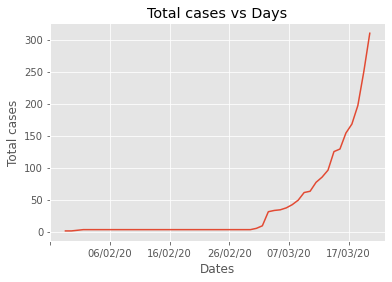

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

style.use('ggplot')
plt.plot(group["Date"], group["total"])
ax = plt.gca()
start, end = ax.get_xlim()
plt.xticks(np.arange(start, end,10))
plt.title('Total cases vs Days')
plt.xlabel('Dates')
plt.ylabel('Total cases')
plt.show()


In [138]:
#selecting required data for analysis
analysis_data = group.iloc[34:52,]
analysis_data

,Date,ConfirmedIndianNational,ConfirmedForeignNational,RecoveryCount,DeathCount,total
34,04/03/20,12,16,3,0,31
35,05/03/20,14,16,3,0,33
36,06/03/20,15,16,3,0,34
37,07/03/20,18,16,3,0,37
38,08/03/20,23,16,3,0,42
39,09/03/20,30,16,3,0,49
40,10/03/20,42,16,3,0,61
41,11/03/20,44,16,3,0,63
42,12/03/20,57,17,3,0,77
43,13/03/20,64,17,3,1,85


In [139]:
#computing rate of increase
r = (analysis_data['total'].diff(periods=1)/analysis_data['total']).mean()
r

0.12431914295663127

In [140]:
#computing predicted forecast for 04/03/20(task 4)
import math

P_t=31*math.exp(r*26)
P_t

785.4720867023805